In [1]:
import keras

from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [24]:
n_samples = 100000 
dim = 32
width = 256
n_hidden = 16
activation = 'linear'

In [30]:
train, test = np.random.uniform(-1, 1, size=[n_samples, dim]), np.random.normal(-1, 1, size=[n_samples, dim])

In [31]:
model = keras.models.Sequential()
model.add(Dense(units=width, activation=activation, input_shape=(dim,)))
for _ in range(n_hidden):
    model.add(Dense(units=width, activation=activation))
model.add(Dense(units=dim, activation=activation))

keras.optimizers.Adam(lr=0.0005)

model.compile('adam', 'mse')

In [33]:
model.fit(train, train, epochs=3, batch_size=128)

Epoch 1/3
100000/100000 [==============================] - 5s - loss: 8.3878e-04     
Epoch 2/3
100000/100000 [==============================] - 5s - loss: 9.8071e-04     
Epoch 3/3
100000/100000 [==============================] - 5s - loss: 0.0016     


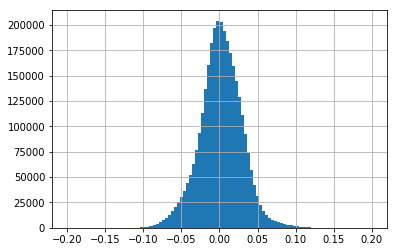

In [34]:
pd.Series((model.predict(test) - test).reshape(-1)).hist(bins=100, range=[-0.2,0.2])